## Question

Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots

# Movie Dataset

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
# importing dataset

data=pd.read_csv("my_movies.csv")
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
data.shape

(10, 15)

In [7]:
data.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

Here first five columns has a few null values and objective catgerory so do not need in model building so 6th column select for futher working.


In [4]:
data1=data.iloc[:,5:]
data1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


# Apriori Algotithm

###### I will calculate with different support(5%, 10%, 15%, 20%, 25%) and confidence( 50%, 70%, 85%, 90%)

#### 1. Support=5% and confidence=90%

In [12]:
# Calculating Support

iteam1 = apriori(data1, min_support=0.05, use_colnames=True)
iteam1

C:\Users\Rishb\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [13]:
# calculating lift ratio

rules1 = association_rules(iteam1,metric="lift",min_threshold=0.9)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
233,(LOTR1),"(Sixth Sense, Green Mile, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(Green Mile),"(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(LOTR2),"(LOTR1, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
236,(Harry Potter1),"(Sixth Sense, LOTR1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


#### An leverage value of 0 indicates independence. Range will be [-1 1]
#### A high conviction value means the consequent is highly depending on the antecedent and range [0 infinity].

In [16]:
# Sorting lift ratio in non-ascending line

rules1.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
94,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,"(LOTR1, Green Mile, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
223,"(LOTR1, Green Mile)","(Sixth Sense, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
156,"(LOTR1, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
199,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
33,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
46,(Green Mile),"(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0


In [17]:
rules1[rules1.lift>1]

## lift ration may > 1 is good for influential for a rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
233,(LOTR1),"(Sixth Sense, Green Mile, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(Green Mile),"(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(LOTR2),"(LOTR1, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
236,(Harry Potter1),"(Sixth Sense, LOTR1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


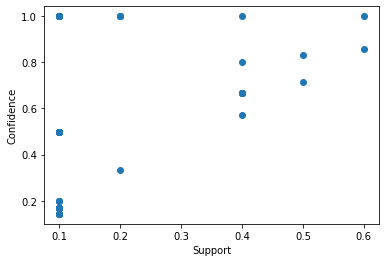

In [18]:
# Visualizatrion of "Support" and "confidence" with scatter plot

plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

### 2. Support=10% and confidence=85%

In [19]:
# Calculating Support

iteam2 = apriori(data1, min_support=0.10, use_colnames=True)
iteam2

C:\Users\Rishb\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [41]:
# calculating confidence

rules2=association_rules(iteam2,metric='lift',min_threshold=0.85)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
233,(LOTR1),"(Sixth Sense, Green Mile, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(Green Mile),"(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(LOTR2),"(LOTR1, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
236,(Harry Potter1),"(Sixth Sense, LOTR1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [42]:
# Sorting lift ratio in non-ascending line

rules2.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
94,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,"(LOTR1, Green Mile, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
223,"(LOTR1, Green Mile)","(Sixth Sense, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
156,"(LOTR1, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
199,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
33,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
46,(Green Mile),"(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0


In [43]:
rules2[rules2.lift>1]

## lift ration may > 1 is good for influential for a rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
233,(LOTR1),"(Sixth Sense, Green Mile, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(Green Mile),"(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(LOTR2),"(LOTR1, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
236,(Harry Potter1),"(Sixth Sense, LOTR1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


###### Here 10 row's lift values are less than 1 

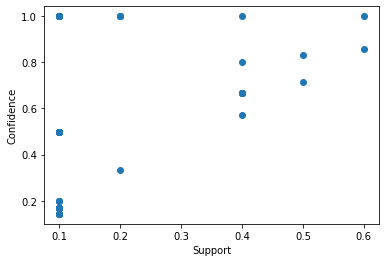

In [44]:
# Visualizatrion of "Support" and "confidence" with scatter plot

plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 3. Support=15% and confidence=70%

In [33]:
# Calculating Support

iteam3 = apriori(data1, min_support=0.15, use_colnames=True)
iteam3

C:\Users\Rishb\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Green Mile, Sixth Sense)"


In [34]:
rules3=association_rules(iteam3,metric='lift',min_threshold=0.7)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [35]:
# Sorting lift ratio in non-ascending line

rules3.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
15,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


In [36]:
rules3[rules3.lift>1]

## lift ration may > 1 is good for influential for a rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


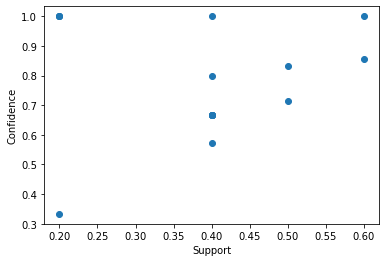

In [37]:
# Visualizatrion of "Support" and "confidence" with scatter plot

plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 4. Support=20% and confidence=50%

In [39]:
# Calculating Support

iteam4 = apriori(data1, min_support=0.20, use_colnames=True)
iteam4

C:\Users\Rishb\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Green Mile, Sixth Sense)"


In [50]:
rules4=association_rules(iteam4,metric='lift',min_threshold=0.5)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [51]:
# Sorting lift ratio in non-ascending line

rules4.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
15,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


In [52]:
rules4[rules4.lift>1]

## lift ration may > 1 is good for influential for a rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


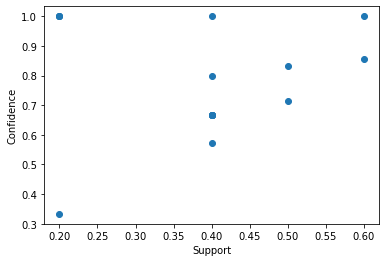

In [53]:
# Visualizatrion of "Support" and "confidence" with scatter plot

plt.scatter(rules4['support'],rules4['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 5. Support=25% and confidence=50%

In [56]:
# Calculating Support

iteam5 = apriori(data1, min_support=0.25, use_colnames=True)
iteam5

C:\Users\Rishb\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Sixth Sense, Patriot)"


In [58]:
rules5=association_rules(iteam5,metric='lift',min_threshold=0.5)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
7,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
8,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


In [59]:
# Sorting lift ratio in non-ascending line

rules5.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
11,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [60]:
rules5[rules5.lift>1]

## lift ration may > 1 is good for influential for a rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
7,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
8,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


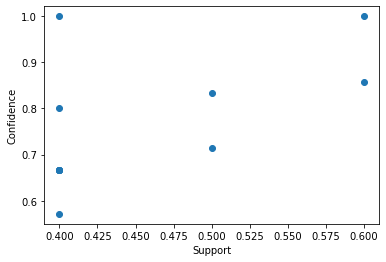

In [61]:
# Visualizatrion of "Support" and "confidence" with scatter plot

plt.scatter(rules5['support'],rules5['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()